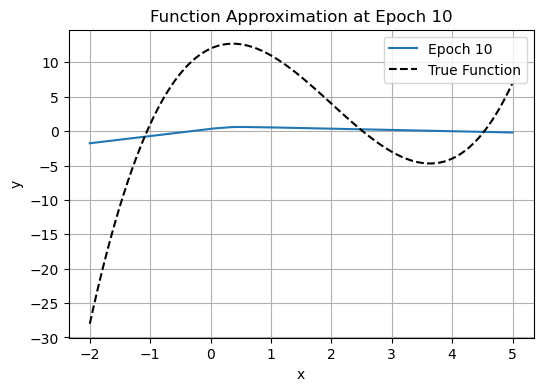

Epoch [10/200], Loss: 71.7725


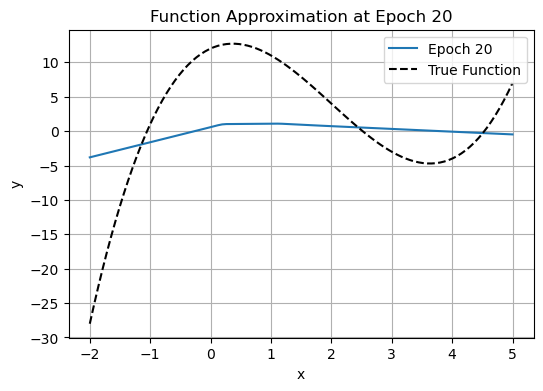

Epoch [20/200], Loss: 64.6698


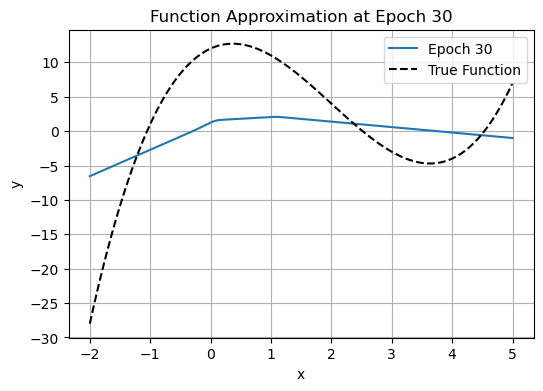

Epoch [30/200], Loss: 55.5489


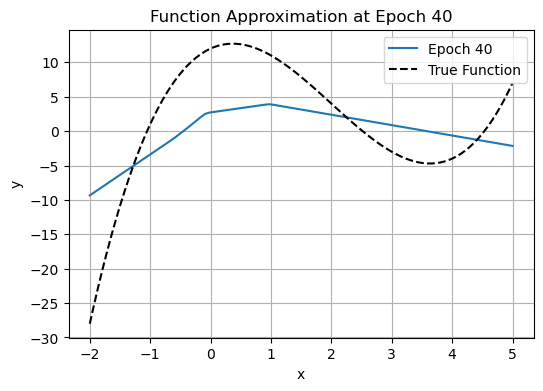

Epoch [40/200], Loss: 43.6132


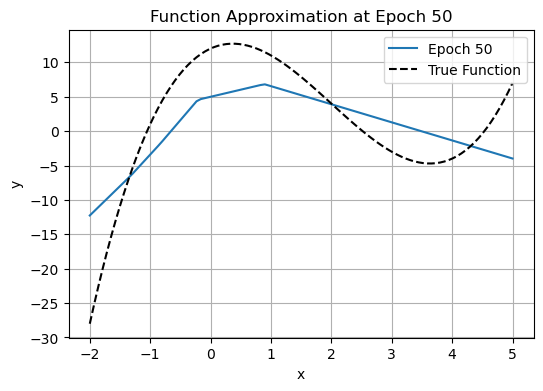

Epoch [50/200], Loss: 29.7076


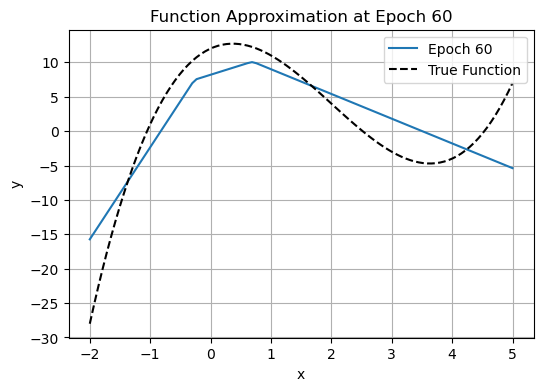

Epoch [60/200], Loss: 18.7634


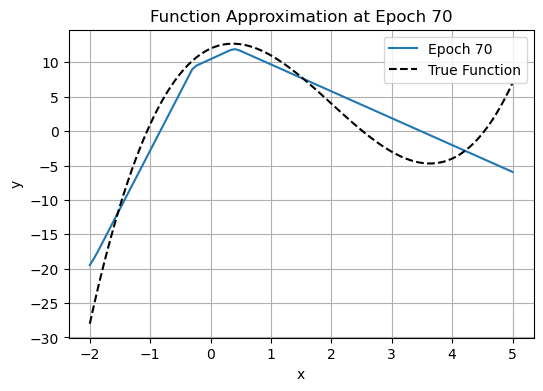

Epoch [70/200], Loss: 14.4776


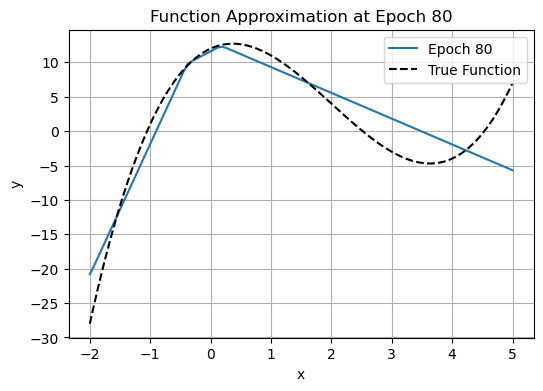

Epoch [80/200], Loss: 12.5700


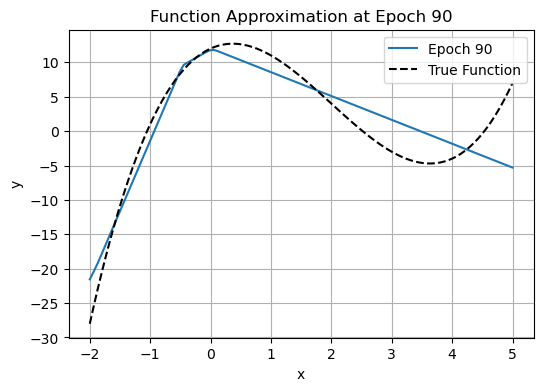

Epoch [90/200], Loss: 11.6722


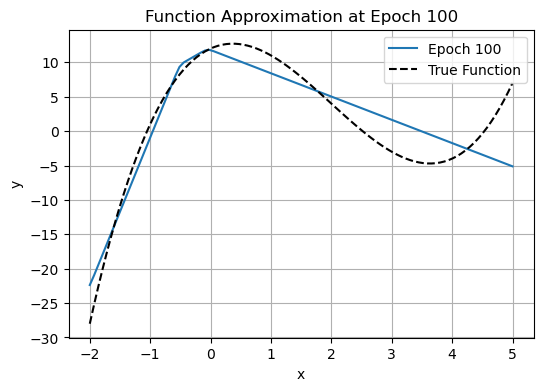

Epoch [100/200], Loss: 11.3081


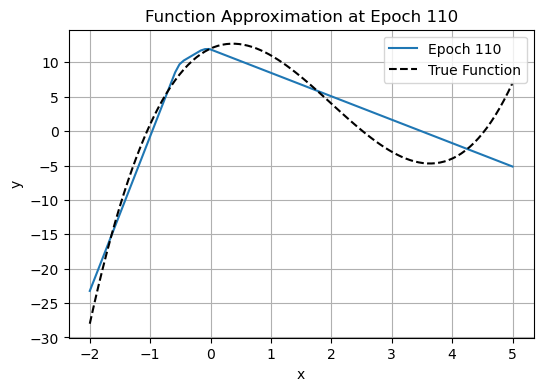

Epoch [110/200], Loss: 11.1117


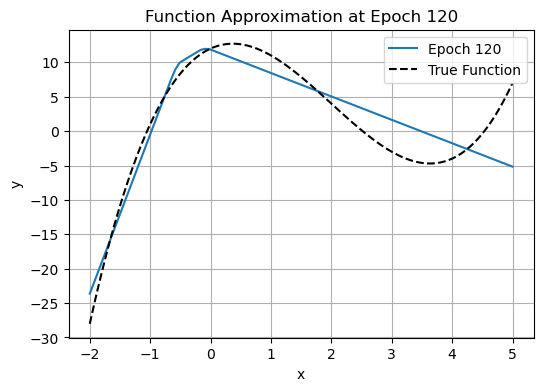

Epoch [120/200], Loss: 11.0093


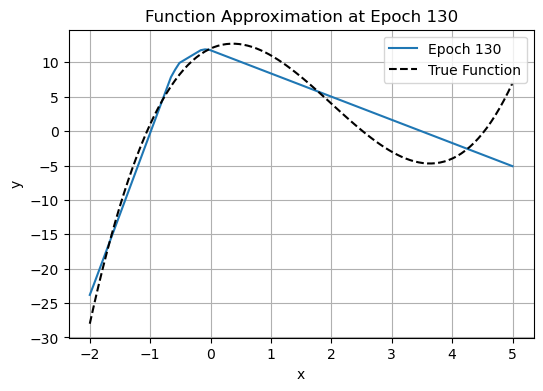

Epoch [130/200], Loss: 10.9361


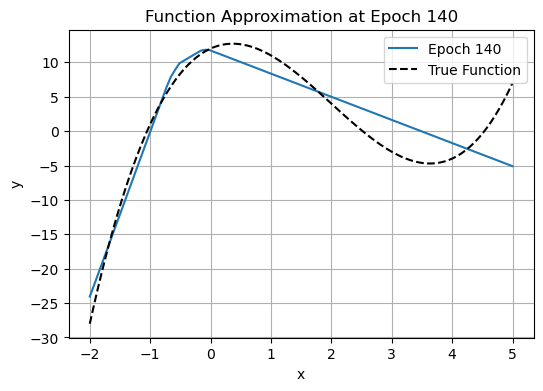

Epoch [140/200], Loss: 10.8748


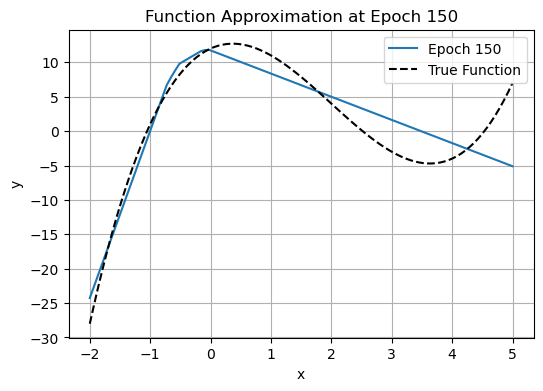

Epoch [150/200], Loss: 10.8176


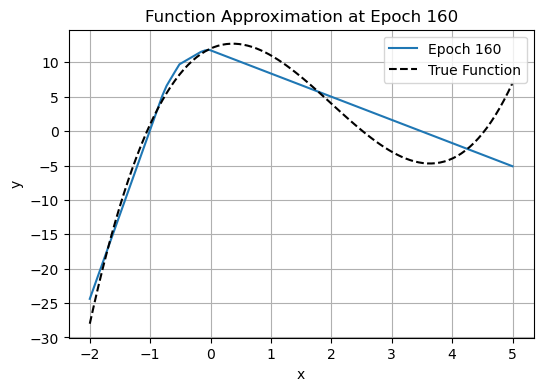

Epoch [160/200], Loss: 10.7624


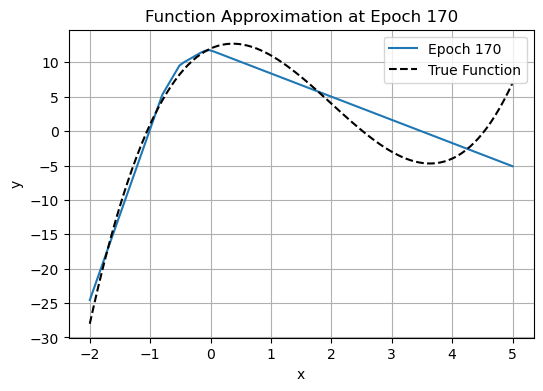

Epoch [170/200], Loss: 10.7071


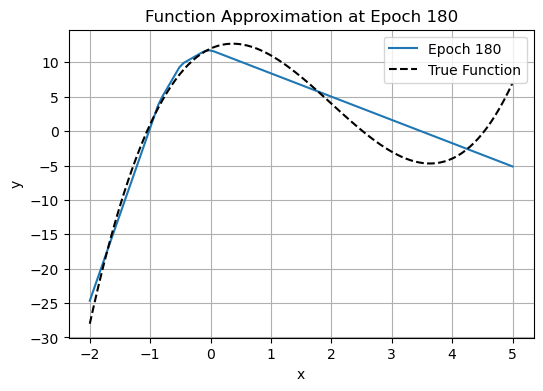

Epoch [180/200], Loss: 10.6498


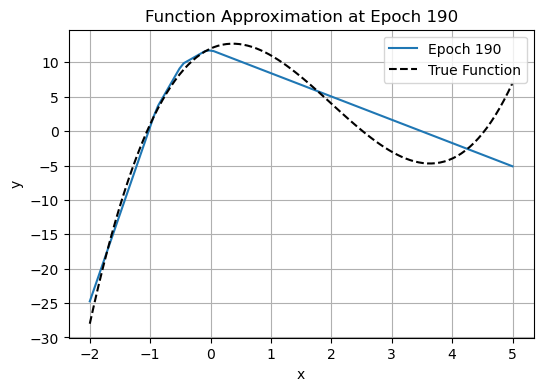

Epoch [190/200], Loss: 10.6008


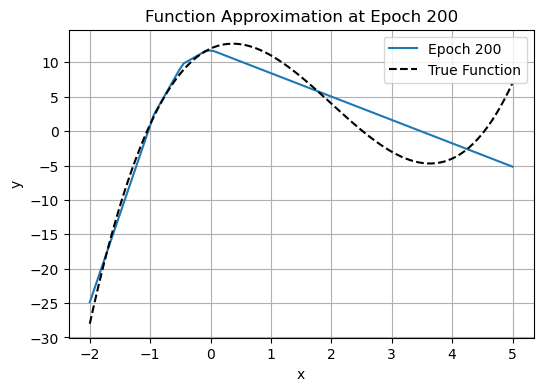

Epoch [200/200], Loss: 10.5613


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate 1D data from a cubic function
def cubic_function(x):
    return x**3 - 6*x**2 + 4*x + 12

# Generate training data
x_train = np.linspace(-2, 5, 100).reshape(-1, 1).astype(np.float32)
y_train = cubic_function(x_train).astype(np.float32)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train)
y_train_tensor = torch.tensor(y_train)

# Define the neural network class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 7)
        self.activation = nn.ReLU()
        self.output = nn.Linear(7, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Initialize the neural network, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

# Training the model
num_epochs = 200

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save the predicted curve after each epoch for visualization
    with torch.no_grad():
        if (epoch + 1) % 10 == 0:
            predicted_curve = model(x_train_tensor).numpy()

            # Plot for the current epoch
            plt.figure(figsize=(6, 4))
            plt.plot(x_train, predicted_curve, label=f"Epoch {epoch + 1}")

            # Plot the original cubic function
            y_true = cubic_function(x_train)
            plt.plot(x_train, y_true, 'k--', label="True Function")

            plt.title(f"Function Approximation at Epoch {epoch + 1}")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.legend()
            plt.grid()
            plt.show()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
